<font size="4">**The impact of different cosmological parameter dependencies on the matter power spectrum**</font>

In [1]:
import camb
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower

sigma8 = 0.7, As = [1.53879391e-09]
sigma8 = 0.8, As = [2.00985327e-09]
sigma8 = 0.9, As = [2.54372055e-09]


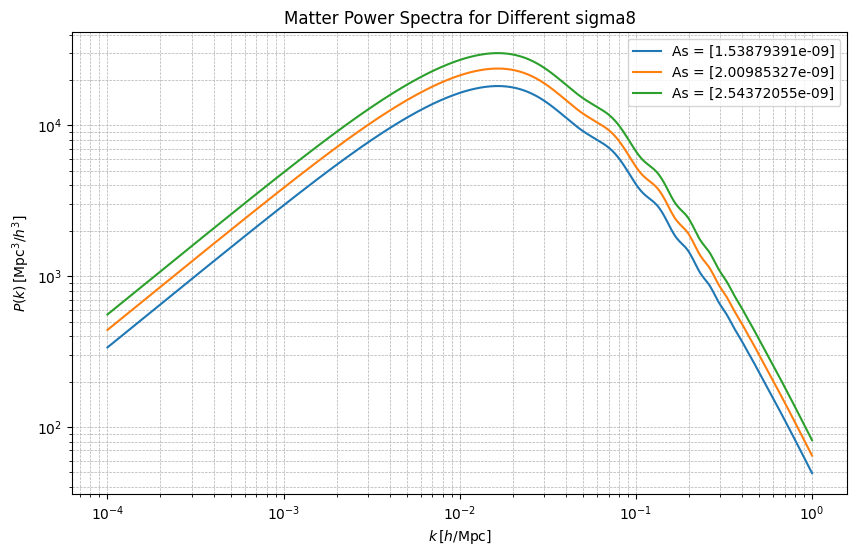

In [2]:
# Set basic parameters
H0 = 67.5
ombh2 = 0.022
omch2 = 0.122
ns = 0.95
tau = 0.06

# Define sigma8 values
sigma8_values = [0.7, 0.8, 0.9]

# Calculate As values corresponding to different sigma8
As_values = []
for sigma8 in sigma8_values:
    # Create a temporary parameter set to calculate As for sigma8
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2)
    pars.InitPower.set_params(ns=ns)
    pars.set_matter_power(redshifts=[0], kmax=2.0)
    pars.set_for_lmax(2000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    # Calculate As corresponding to sigma8
    As = (sigma8 / results.get_sigma8()) ** 2 * pars.InitPower.As
    As_values.append(As)
    print(f"sigma8 = {sigma8}, As = {As}")

# Plot matter power spectra
fig, ax = plt.subplots(figsize=(10, 6))

for sigma8, As in zip(sigma8_values, As_values):
    # Set parameters
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2)
    pars.InitPower.set_params(ns=ns, As=As)
    pars.set_matter_power(redshifts=[0], kmax=2.0)
    pars.set_for_lmax(2000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    # Get matter power spectrum
    k, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=512)
    ax.loglog(k, pk[0], label=f'As = {As}')

ax.set_xlabel(r'$k \, [h/\mathrm{Mpc}]$')
ax.set_ylabel(r'$P(k) \, [\mathrm{Mpc}^3/h^3]$')
ax.set_title('Matter Power Spectra for Different sigma8')
ax.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

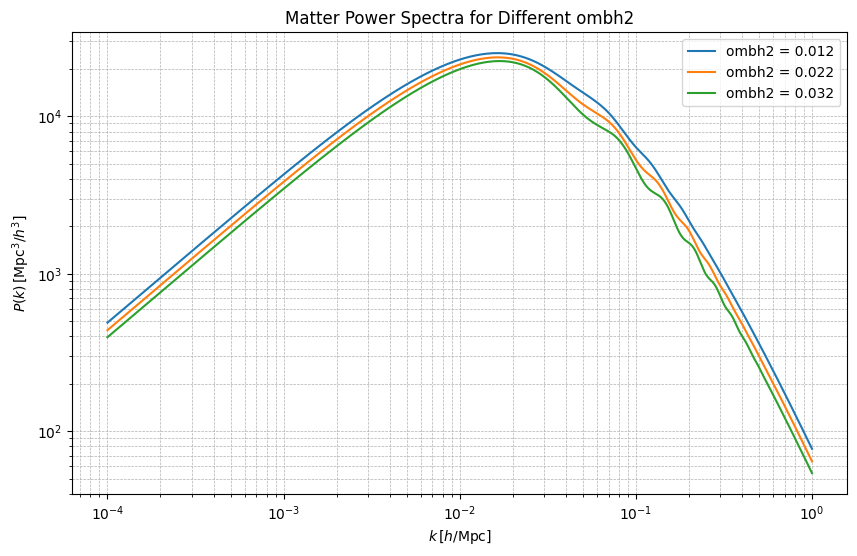

In [3]:
# Set basic parameters
H0 = 67.5
ombh2_values = [0.012, 0.022, 0.032]  # Different ombh2 values
omch2 = 0.122
ns = 0.95
tau = 0.06

# Plot matter power spectra
fig, ax = plt.subplots(figsize=(10, 6))

for ombh2 in ombh2_values:
    # Set parameters
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2)
    pars.InitPower.set_params(ns=ns)
    pars.set_matter_power(redshifts=[0], kmax=2.0)
    pars.set_for_lmax(2000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    # Get matter power spectrum
    k, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=512)
    ax.loglog(k, pk[0], label=f'ombh2 = {ombh2}')

ax.set_xlabel(r'$k \, [h/\mathrm{Mpc}]$')
ax.set_ylabel(r'$P(k) \, [\mathrm{Mpc}^3/h^3]$')
ax.set_title('Matter Power Spectra for Different ombh2')
ax.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

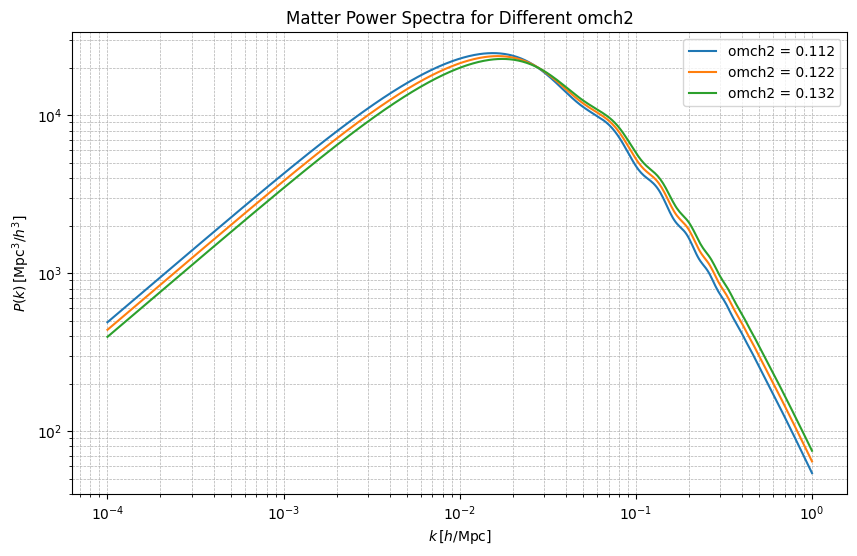

In [4]:
# Set basic parameters
H0 = 67.5
ombh2 = 0.022
omch2_values = [0.112, 0.122, 0.132]  # Different omch2 values
ns = 0.95
tau = 0.06

# Plot matter power spectra
fig, ax = plt.subplots(figsize=(10, 6))

for omch2 in omch2_values:
    # Set parameters
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2)
    pars.InitPower.set_params(ns=ns)
    pars.set_matter_power(redshifts=[0], kmax=2.0)
    pars.set_for_lmax(2000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    # Get matter power spectrum
    k, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=512)
    ax.loglog(k, pk[0], label=f'omch2 = {omch2}')

ax.set_xlabel(r'$k \, [h/\mathrm{Mpc}]$')
ax.set_ylabel(r'$P(k) \, [\mathrm{Mpc}^3/h^3]$')
ax.set_title('Matter Power Spectra for Different omch2')
ax.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

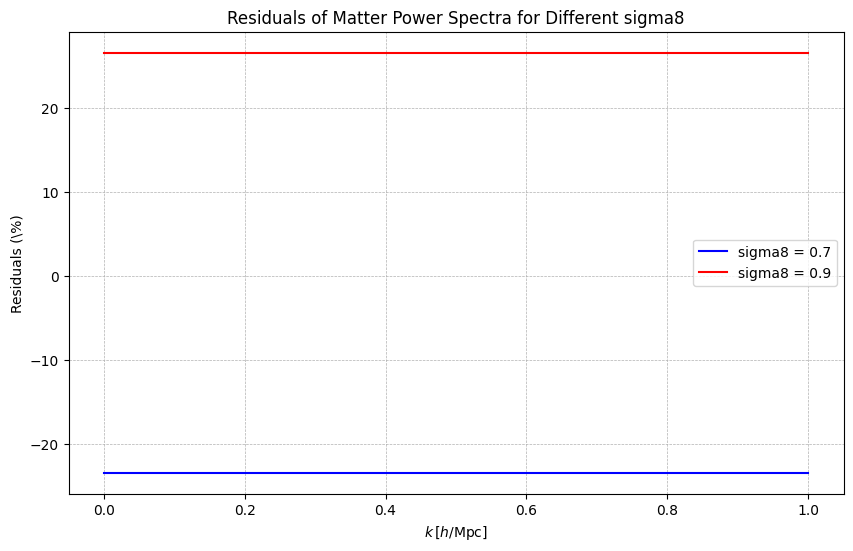

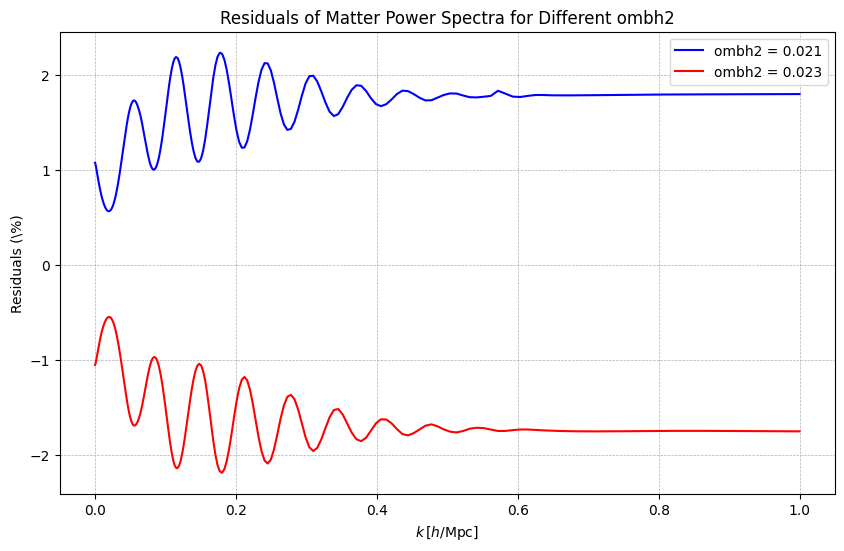

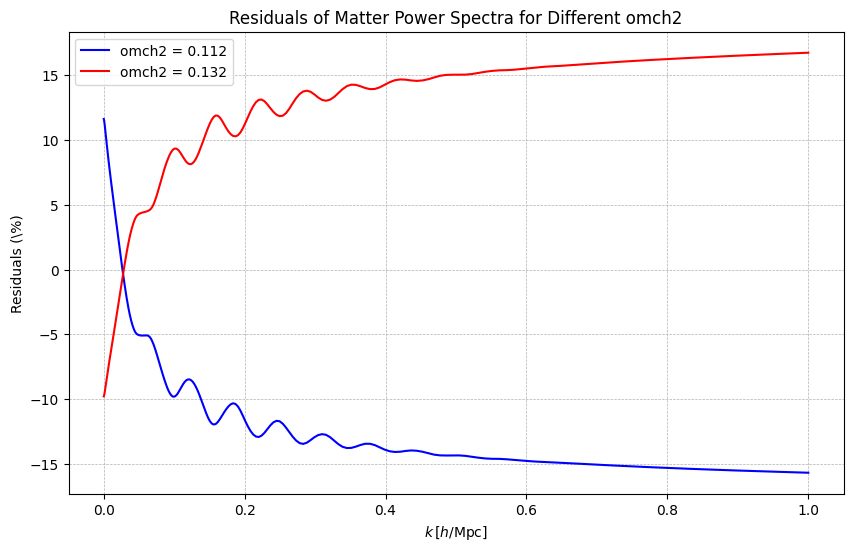

In [5]:
# Set basic parameters
H0 = 67.5
ns = 0.95
tau = 0.06

# Standard parameter values
standard_params = {
    'sigma8': 0.8,
    'ombh2': 0.022,
    'omch2': 0.122
}

# Deviation parameter values
deviation_params = {
    'sigma8': [0.7, 0.9],
    'ombh2': [0.021, 0.023],
    'omch2': [0.112, 0.132]
}

# Calculate the power spectrum for standard values
def get_standard_power_spectrum():
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=standard_params['ombh2'], omch2=standard_params['omch2'])
    pars.InitPower.set_params(ns=ns, As=1.8e-9)
    pars.set_matter_power(redshifts=[0], kmax=2.0)
    pars.set_for_lmax(2000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    k, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=512)
    return k, pk[0]

k_standard, pk_standard = get_standard_power_spectrum()

# Calculate residuals and plot residual plots
def plot_residuals(param_name, deviation_values):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Get the minimum and maximum values of the current parameter
    min_value = min(deviation_values)
    max_value = max(deviation_values)
    
    for value in deviation_values:
        # Set parameters
        pars = camb.CAMBparams()
        if param_name == 'sigma8':
            As = (value / standard_params['sigma8']) ** 2 * 1.8e-9
            pars.set_cosmology(H0=H0, ombh2=standard_params['ombh2'], omch2=standard_params['omch2'])
            pars.InitPower.set_params(ns=ns, As=As)
        elif param_name == 'ombh2':
            pars.set_cosmology(H0=H0, ombh2=value, omch2=standard_params['omch2'])
            pars.InitPower.set_params(ns=ns, As=1.8e-9)
        elif param_name == 'omch2':
            pars.set_cosmology(H0=H0, ombh2=standard_params['ombh2'], omch2=value)
            pars.InitPower.set_params(ns=ns, As=1.8e-9)
        
        pars.set_matter_power(redshifts=[0], kmax=2.0)
        pars.set_for_lmax(2000, lens_potential_accuracy=0)
        results = camb.get_results(pars)
        k, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=512)
        
        # Calculate residuals
        residuals = (pk[0] - pk_standard) / pk_standard * 100  # Percentage residuals
        
        if value == max_value:
            ax.plot(k, residuals, 'r-', label=f'{param_name} = {value}')
        elif value == min_value:
            ax.plot(k, residuals, 'b-', label=f'{param_name} = {value}')
    
    ax.set_xlabel(r'$k \, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'Residuals (\%)')
    ax.set_title(f'Residuals of Matter Power Spectra for Different {param_name}')
    ax.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Plot residual plots for each parameter
for param, values in deviation_params.items():
    plot_residuals(param, values)